In [166]:
import pandas as pd
import numpy as np

In [167]:
df = pd.read_csv("https://raw.githubusercontent.com/nflverse/nfldata/master/data/games.csv")

In [168]:
df.drop(df.iloc[:, 0:7], axis=1, inplace=True)
df.drop(df.iloc[:, 8:15], axis=1, inplace=True)
df.drop(df.iloc[:, 23:32], axis=1, inplace=True)
df.drop(['surface'], axis=1, inplace=True)
df.fillna(0, inplace=True)
df.head()

,away_team,away_score,home_team,home_score,location,result,total,overtime,away_rest,home_rest,...,spread_line,away_spread_odds,home_spread_odds,total_line,under_odds,over_odds,div_game,roof,temp,wind
0,MIN,17.0,ATL,14.0,Home,-3.0,31.0,0.0,7,7,...,-4.0,0.0,0.0,49.0,0.0,0.0,0,dome,0.0,0.0
1,KC,17.0,CHI,20.0,Home,3.0,37.0,0.0,7,7,...,-3.0,0.0,0.0,38.0,0.0,0.0,0,outdoors,80.0,12.0
2,PIT,43.0,CLE,0.0,Home,-43.0,43.0,0.0,7,7,...,-6.0,0.0,0.0,37.0,0.0,0.0,1,outdoors,78.0,12.0
3,OAK,24.0,GB,28.0,Home,4.0,52.0,0.0,7,7,...,9.0,0.0,0.0,43.0,0.0,0.0,0,outdoors,67.0,10.0
4,BUF,14.0,IND,31.0,Home,17.0,45.0,0.0,7,7,...,-3.0,0.0,0.0,45.5,0.0,0.0,1,dome,0.0,0.0


In [169]:
df.roof.replace(to_replace=dict(dome=1, outdoors=0, closed=1, open=0), inplace=True)
df.rename(columns={"roof": "indoor_game"}, inplace=True)

df['home_win'] = np.where(df['home_score'] > df['away_score'], 1, 0)
df.rename(columns={"result": "home_winning_margin"}, inplace=True)

df['over_totals_win'] = np.where(df['total'] > df['total_line'], 1, 0)
df['over_winning_margin'] = df.apply(lambda x: x['total'] - x['total_line'], axis=1)

df['home_spread_win'] = np.where(df['home_winning_margin'] > df['spread_line'], 1, 0)
df['home_spread_winning_margin'] = df.apply(lambda x: x['home_winning_margin'] - x['spread_line'], axis=1)

C:\Users\Mark\AppData\Local\Temp\ipykernel_17076\2086745645.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.roof.replace(to_replace=dict(dome=1, outdoors=0, closed=1, open=0), inplace=True)
C:\Users\Mark\AppData\Local\Temp\ipykernel_17076\2086745645.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', 

In [170]:
df1 = df.iloc[6460]
df1

away_team                       LAC
away_score                     28.0
home_team                       MIN
home_score                     24.0
location                       Home
home_winning_margin            -4.0
total                          52.0
overtime                        0.0
away_rest                         7
home_rest                        10
away_moneyline               -110.0
home_moneyline               -110.0
spread_line                     1.0
away_spread_odds             -115.0
home_spread_odds             -105.0
total_line                     54.0
under_odds                   -110.0
over_odds                    -110.0
div_game                          0
indoor_game                       1
temp                            0.0
wind                            0.0
home_win                          0
over_totals_win                   0
over_winning_margin            -2.0
home_spread_win                   0
home_spread_winning_margin     -5.0
Name: 6460, dtype: object

In [171]:
df.describe(include=[np.number])

,away_score,home_score,home_winning_margin,total,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,...,over_odds,div_game,indoor_game,temp,wind,home_win,over_totals_win,over_winning_margin,home_spread_win,home_spread_winning_margin
count,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,...,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000
mean,20.060332,22.328891,2.268558,42.389223,0.058899,7.473345,7.515621,58.180138,-92.628977,2.282531,...,-57.279736,0.377472,0.246489,40.120952,5.904987,0.542992,0.465033,-1.148682,0.470335,-0.013972
std,10.662743,11.068656,14.336087,16.336923,0.235453,1.982782,2.092829,242.422769,277.724551,5.893971,...,69.812454,0.484789,0.430997,30.232845,5.983662,0.498184,0.498812,15.942847,0.499155,13.027055
min,0.000000,0.000000,-49.000000,0.000000,0.000000,4.000000,4.000000,-1500.000000,-5000.000000,-19.000000,...,-125.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,0.000000,-51.000000,0.000000,-52.000000
25%,13.000000,15.000000,-6.000000,33.000000,0.000000,7.000000,7.000000,-107.000000,-209.000000,-2.500000,...,-108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,0.000000,-8.000000
50%,20.000000,23.000000,3.000000,43.000000,0.000000,7.000000,7.000000,0.000000,0.000000,3.000000,...,-103.000000,0.000000,0.000000,48.000000,5.000000,1.000000,0.000000,-1.000000,0.000000,-0.500000
75%,27.000000,30.000000,10.000000,52.000000,0.000000,7.000000,7.000000,186.000000,0.000000,6.500000,...,0.000000,1.000000,0.000000,65.000000,10.000000,1.000000,1.000000,9.000000,1.000000,8.000000
max,59.000000,70.000000,59.000000,106.000000,1.000000,21.000000,16.000000,2173.000000,1100.000000,27.000000,...,113.000000,1.000000,1.000000,109.000000,71.000000,1.000000,1.000000,68.500000,1.000000,49.500000


In [172]:
df.describe(include=[object]) 

,away_team,home_team,location
count,6978,6978,6978
unique,35,35,2
top,BAL,NE,Home
freq,231,239,6894


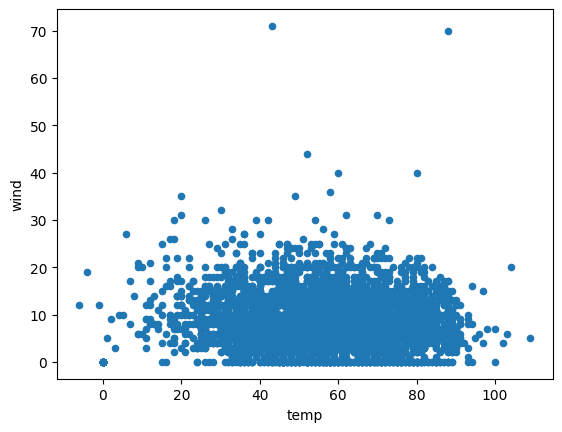

In [173]:
import matplotlib.pyplot as plt
df.plot(kind= 'scatter', x='temp', y='wind')

plt.show()

In [174]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
scaler = StandardScaler()

In [175]:
df['home_team'] = label_encoder.fit_transform(df['home_team'])
df['away_team'] = label_encoder.fit_transform(df['away_team'])
#df['surface'] = label_encoder.fit_transform(df['surface'])
df['location'] = label_encoder.fit_transform(df['location'])

In [176]:
df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','indoor_game','temp','wind','home_win','home_spread_win','home_spread_winning_margin']] = \
    scaler.fit_transform(df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','indoor_game','temp','wind','home_win','home_spread_win','home_spread_winning_margin']])

In [177]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['over_totals_win','away_score','home_score','total','over_winning_margin'], axis=1), df['over_totals_win'], test_size=0.3)

In [178]:
X_train

,away_team,home_team,location,home_winning_margin,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,...,total_line,under_odds,over_odds,div_game,indoor_game,temp,wind,home_win,home_spread_win,home_spread_winning_margin
3333,8,34,0,-0.367530,3.997262,-0.238745,-0.246393,-1.601368,1.374226,-1.575033,...,-0.109846,-0.729230,-0.683598,1.284213,-0.571945,0.723737,-0.318388,-1.090021,1.061199,0.308148
3080,14,23,0,0.120784,-0.250171,-0.238745,-0.246393,0.902702,-0.800746,0.970123,...,-0.211952,2.068579,-0.798199,-0.778687,-0.571945,0.095236,0.015880,0.917413,-0.942331,-0.306003
1873,21,24,0,-0.646566,-0.250171,-0.238745,-0.246393,-0.240012,0.333552,-1.405356,...,-1.028798,0.689949,0.820539,1.284213,-0.571945,1.451474,0.015880,-1.090021,-0.942331,-0.075696
6182,11,32,0,-0.297771,-0.250171,-0.238745,-0.246393,0.222024,-0.109364,-0.217616,...,-0.416164,-0.702198,-0.740899,-0.778687,-0.571945,-1.327160,-0.986922,-1.090021,-0.942331,-0.229234
219,9,10,0,-0.855843,-0.250171,-0.743123,-0.724249,-0.240012,0.333552,0.376254,...,-0.007741,0.689949,0.820539,-0.778687,1.748421,-1.327160,-0.986922,-1.090021,-0.942331,-1.112075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,23,1,0,-1.065120,-0.250171,-0.238745,3.098602,0.354034,-0.220994,0.121738,...,-0.518269,-0.702198,-0.712249,-0.778687,1.748421,-1.327160,-0.986922,-1.090021,-0.942331,-1.227229
5690,21,3,0,0.051025,-0.250171,-0.238745,-0.246393,0.481919,-0.375835,0.291415,...,-0.518269,-0.688682,-0.740899,1.284213,-0.571945,0.029078,1.854351,0.917413,-0.942331,-0.075696
2032,12,25,0,-0.786084,-0.250171,-0.238745,-0.246393,0.465418,-0.318219,0.121738,...,-1.743539,-0.729230,-0.683598,-0.778687,-0.571945,0.525263,0.350147,-1.090021,-0.942331,-0.920153
4147,11,20,0,-0.367530,-0.250171,-0.238745,-0.246393,-1.642621,1.403034,-1.659871,...,1.319634,-0.796810,2.253051,1.284213,-0.571945,0.293710,-0.986922,-1.090021,1.061199,0.346532


In [179]:
X_train.corr()

,away_team,home_team,location,home_winning_margin,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,...,total_line,under_odds,over_odds,div_game,indoor_game,temp,wind,home_win,home_spread_win,home_spread_winning_margin
away_team,1.000000,-0.075753,0.005775,-0.036027,0.018634,-0.009996,0.019657,-0.017021,0.016980,-0.067249,...,-0.016226,-0.006036,0.011479,0.013399,0.012704,-0.000666,0.007409,-0.029646,-0.003609,-0.009308
home_team,-0.075753,1.000000,0.013889,0.009940,-0.003134,0.027030,0.022725,-0.025914,0.027310,0.033318,...,-0.001641,0.003351,0.025179,-0.000746,-0.172989,0.211269,0.086373,0.008288,0.000969,-0.004103
location,0.005775,0.013889,1.000000,-0.017794,-0.010917,0.063370,0.072641,-0.063609,0.048102,-0.070952,...,0.045963,-0.028875,-0.026120,-0.058482,0.001680,-0.021542,-0.011578,-0.030860,0.009304,0.012455
home_winning_margin,-0.036027,0.009940,-0.017794,1.000000,-0.035695,-0.022770,0.019856,0.335213,-0.314570,0.419901,...,-0.002355,0.016208,0.001460,-0.039328,-0.008450,-0.008044,0.005260,0.763658,0.686635,0.912048
overtime,0.018634,-0.003134,-0.010917,-0.035695,1.000000,0.023198,-0.003352,-0.011909,0.021717,-0.000997,...,-0.028510,0.023639,0.028789,0.001483,0.008770,-0.011779,0.011405,-0.007869,-0.065756,-0.038878
away_rest,-0.009996,0.027030,0.063370,-0.022770,0.023198,1.000000,0.230167,-0.011487,0.010127,-0.018448,...,0.030007,0.001985,-0.025241,-0.031338,-0.019228,0.024148,0.041589,-0.024950,-0.005070,-0.016751
home_rest,0.019657,0.022725,0.072641,0.019856,-0.003352,0.230167,1.000000,0.041762,-0.036061,0.053018,...,0.010981,0.027901,0.001049,-0.049757,-0.011673,0.018795,0.045456,0.007245,-0.001122,-0.002079
away_moneyline,-0.017021,-0.025914,-0.063609,0.335213,-0.011909,-0.011487,0.041762,1.000000,-0.966325,0.823131,...,0.043294,-0.044413,-0.085321,-0.039397,-0.007277,-0.023066,-0.003505,0.283488,-0.043180,-0.002599
home_moneyline,0.016980,0.027310,0.048102,-0.314570,0.021717,0.010127,-0.036061,-0.966325,1.000000,-0.781552,...,-0.072875,0.079101,0.120259,0.039805,0.001662,0.036889,0.012602,-0.263316,0.040349,0.006556
spread_line,-0.067249,0.033318,-0.070952,0.419901,-0.000997,-0.018448,0.053018,0.823131,-0.781552,1.000000,...,-0.002129,0.027616,0.010974,-0.030225,-0.000736,-0.015167,0.000770,0.349807,-0.042110,0.010790


In [180]:
y_train

3333    1
3080    1
1873    1
6182    0
219     0
       ..
1919    0
5690    1
2032    1
4147    0
1262    0
Name: over_totals_win, Length: 4884, dtype: int32

In [181]:
X_test

,away_team,home_team,location,home_winning_margin,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,...,total_line,under_odds,over_odds,div_game,indoor_game,temp,wind,home_win,home_spread_win,home_spread_winning_margin
3430,32,1,0,1.306687,-0.250171,0.265633,-0.724249,1.410117,-1.358893,1.309478,...,0.400682,-0.688682,-0.726574,1.284213,1.748421,-1.327160,-0.986922,0.917413,1.061199,0.845530
1025,2,27,0,0.051025,-0.250171,-0.238745,-0.724249,-0.240012,0.333552,0.970123,...,-0.926692,0.689949,0.820539,1.284213,-0.571945,-0.268633,0.015880,0.917413,-0.942331,-0.382771
662,9,8,0,-0.297771,-0.250171,-1.751879,-1.679962,-0.240012,0.333552,-1.575033,...,-0.620375,0.689949,0.820539,-0.778687,-0.571945,1.054526,-0.986922,-1.090021,1.061199,0.384917
6695,11,8,0,-1.274397,-0.250171,-0.238745,-0.246393,0.894451,-0.908775,0.800446,...,1.830163,-0.729230,-0.826850,-0.778687,1.748421,-1.327160,-0.986922,-1.090021,-0.942331,-1.764610
2100,11,5,0,-1.483674,-0.250171,1.274389,-0.246393,-0.240012,0.333552,0.036900,...,-1.335115,0.689949,0.820539,1.284213,-0.571945,0.326789,0.684415,-1.090021,-0.942331,-1.649457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4542,13,9,0,0.818374,-0.250171,-0.238745,1.187176,0.585052,-0.473060,0.461092,...,0.707000,-0.742746,-0.669273,-0.778687,-0.571945,1.484553,-0.318388,0.917413,1.061199,0.691992
2148,3,21,0,2.004278,-0.250171,-0.238745,-0.246393,4.710373,-5.427965,2.412378,...,-0.518269,-0.769778,-0.640623,1.284213,-0.571945,1.120684,0.684415,0.917413,1.061199,1.114221
6126,26,32,0,0.957892,-0.250171,0.265633,-0.246393,0.968707,-0.933982,0.885285,...,0.400682,2.041547,-0.783874,-0.778687,-0.571945,0.856053,2.522885,0.917413,1.061199,0.653608
5754,22,9,0,-2.111506,-0.250171,-0.238745,-0.246393,-5.809195,3.596011,-3.271803,...,-1.437221,-0.783294,-0.640623,-0.778687,-0.571945,-0.070159,0.015880,-1.090021,-0.942331,-0.843384


In [182]:
y_test

3430    1
1025    1
662     1
6695    1
2100    0
       ..
4542    1
2148    1
6126    1
5754    0
2788    1
Name: over_totals_win, Length: 2094, dtype: int32

In [183]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test)) 

0.556829035339064


C:\Users\Mark\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [184]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_pred = model.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))


Accuracy: 0.56
Precision: 0.51
Recall: 0.35
